# Name- Manisha Chouhan 
## Task4- Exploratory Data Analysis- Terrorism

### Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Read required Dataset

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### All the columns in the dataset

In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

#### Preprocessing the dataset by selecting the required columns 

In [8]:
df=df[['iyear','imonth','iday','country_txt','region','region_txt','provstate','city','latitude', 'longitude','attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','natlty1_txt','gname','weaptype1_txt','nkill','nwound']]

##### Renaming the selected columns to look data clean and avoid confusion

In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region':'Region No','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitiute','longitude':'Longitude','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','targsubtype1_txt':'Target Subtype','corp1':'Corporation','natlty1_txt':'Nationality','gname':'GroupName','weaptype1_txt':'Weapon','nkill':'Kill','nwound':'Wound'},inplace=True)

In [10]:
df.head()

,Year,Month,Day,Country,Region No,Region,State,City,Latitiute,Longitude,Attacktype,Targettype,Target Subtype,Corporation,Nationality,GroupName,Weapon,Kill,Wound
0,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,NaN,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Incendiary,NaN,NaN


##### Finding the missing values

In [11]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region No             0
Region                0
State               421
City                434
Latitiute          4556
Longitude          4557
Attacktype            0
Targettype            0
Target Subtype    10373
Corporation       42550
Nationality        1559
GroupName             0
Weapon                0
Kill              10313
Wound             16311
dtype: int64

#### Droped the NA values 

In [12]:
df=df.dropna()
df.isna().sum()

Year              0
Month             0
Day               0
Country           0
Region No         0
Region            0
State             0
City              0
Latitiute         0
Longitude         0
Attacktype        0
Targettype        0
Target Subtype    0
Corporation       0
Nationality       0
GroupName         0
Weapon            0
Kill              0
Wound             0
dtype: int64

#### Created a new column

In [13]:
df['Casualties']=df['Kill']+df['Wound']

#### Information of overall data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117888 entries, 1 to 181689
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            117888 non-null  int64  
 1   Month           117888 non-null  int64  
 2   Day             117888 non-null  int64  
 3   Country         117888 non-null  object 
 4   Region No       117888 non-null  int64  
 5   Region          117888 non-null  object 
 6   State           117888 non-null  object 
 7   City            117888 non-null  object 
 8   Latitiute       117888 non-null  float64
 9   Longitude       117888 non-null  float64
 10  Attacktype      117888 non-null  object 
 11  Targettype      117888 non-null  object 
 12  Target Subtype  117888 non-null  object 
 13  Corporation     117888 non-null  object 
 14  Nationality     117888 non-null  object 
 15  GroupName       117888 non-null  object 
 16  Weapon          117888 non-null  object 
 17  Kill      

#### Satistics description of Data

In [15]:
df.describe()

,Year,Month,Day,Region No,Latitiute,Longitude,Kill,Wound,Casualties
count,117888.000000,117888.000000,117888.000000,117888.000000,117888.000000,117888.000000,117888.000000,117888.000000,117888.000000
mean,2006.336226,6.468165,15.569956,7.384857,24.283638,36.067379,2.192437,3.464169,5.656606
std,11.199063,3.386905,8.788247,2.787364,16.913719,53.848948,10.324707,41.934568,48.657299
min,1970.000000,0.000000,0.000000,1.000000,-45.867889,-176.176447,0.000000,0.000000,0.000000
25%,1997.000000,4.000000,8.000000,6.000000,12.825647,20.151144,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,7.000000,31.633979,44.371773,1.000000,0.000000,1.000000
75%,2015.000000,9.000000,23.000000,10.000000,34.417122,69.928467,2.000000,2.000000,5.000000
max,2017.000000,12.000000,31.000000,12.000000,74.633553,179.366667,1384.000000,8191.000000,9574.000000


In [16]:
df.corr()


,Year,Month,Day,Region No,Latitiute,Longitude,Kill,Wound,Casualties
Year,1.000000,-0.005914,0.012764,0.391329,0.207944,0.494895,0.012179,0.010870,0.011953
Month,-0.005914,1.000000,0.004417,-0.000961,-0.016505,-0.008532,0.003083,0.002295,0.002632
Day,0.012764,0.004417,1.000000,0.004471,-0.002286,0.004179,-0.001080,-0.002267,-0.002183
Region No,0.391329,-0.000961,0.004471,1.000000,0.283438,0.291491,0.044474,0.014141,0.021624
Latitiute,0.207944,-0.016505,-0.002286,0.283438,1.000000,0.215408,-0.006956,0.015220,0.011641
Longitude,0.494895,-0.008532,0.004179,0.291491,0.215408,1.000000,0.005116,0.008926,0.008779
Kill,0.012179,0.003083,-0.001080,0.044474,-0.006956,0.005116,1.000000,0.580218,0.712245
Wound,0.010870,0.002295,-0.002267,0.014141,0.015220,0.008926,0.580218,1.000000,0.984953
Casualties,0.011953,0.002632,-0.002183,0.021624,0.011641,0.008779,0.712245,0.984953,1.000000


#### Heatmap

<AxesSubplot:>

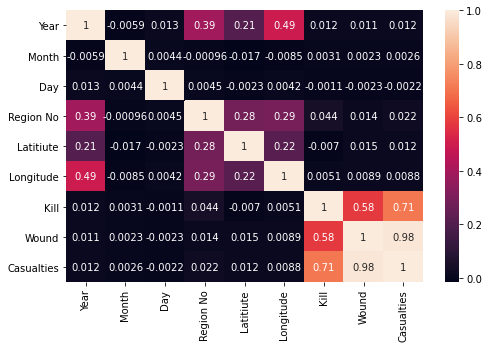

In [17]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

#### PLot for No of Region attacked by terrorists

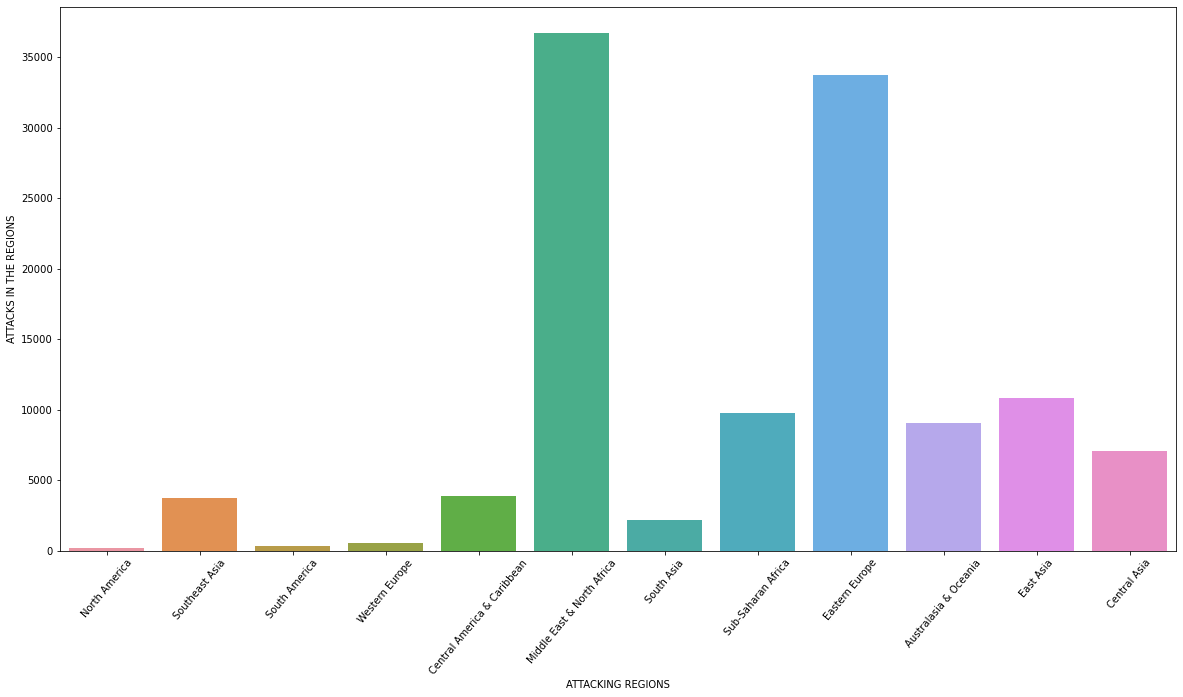

In [18]:
Region=df['Region'].unique()
Region_count=df['Region'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x= Region,y= Region_count)
plt.xticks(rotation=50)
plt.xlabel('ATTACKING REGIONS')
plt.ylabel('ATTACKS IN THE REGIONS')
plt.show()

#### Plot for No of Years the attack happend

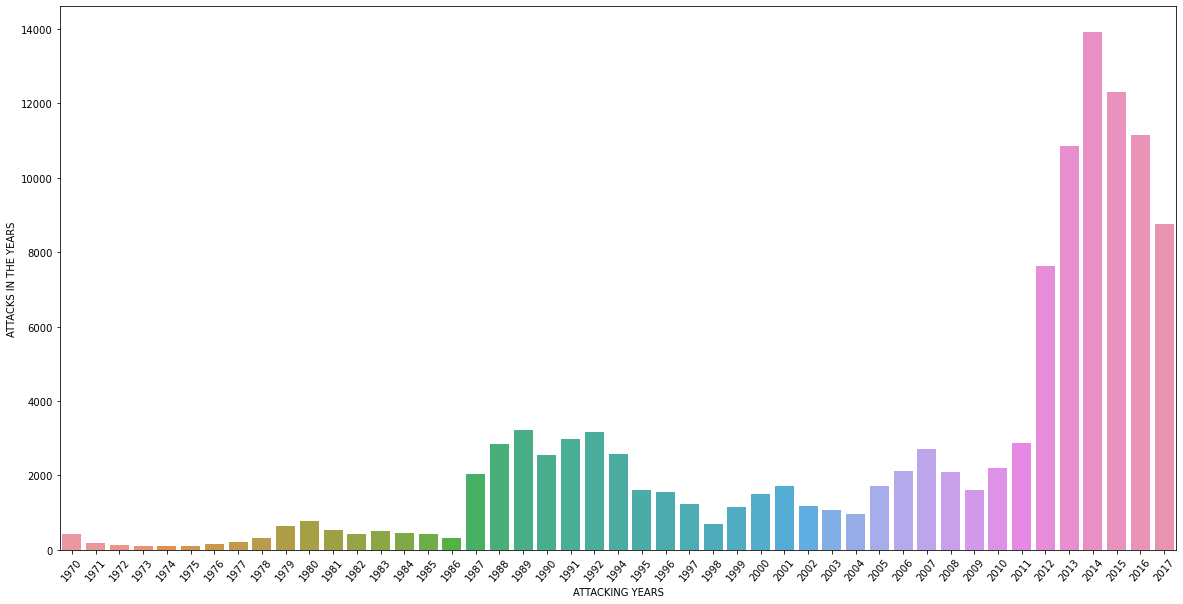

In [19]:
Year=df['Year'].unique()
Year_count=df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x= Year,y= Year_count)
#plt.plot(data=df1,marker='o',color='r')
plt.xticks(rotation=50)
plt.xlabel('ATTACKING YEARS')
plt.ylabel('ATTACKS IN THE YEARS')
plt.show()

In [20]:
Attack=df.Country.value_counts()[:10]
Attack

Iraq           19180
Pakistan       10838
Afghanistan    10018
India           8560
Philippines     4993
Colombia        4780
Turkey          2978
Thailand        2801
Peru            2788
Somalia         2712
Name: Country, dtype: int64

#### Plot for No of Countries faced the attack 

<AxesSubplot:>

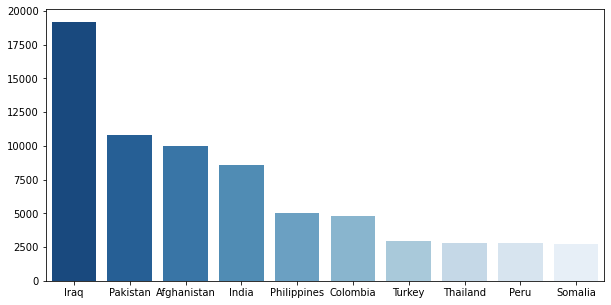

In [21]:
fig=plt.figure(figsize=(10,5))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='Blues_r')

#### PLot for No of Casualties present in  Regions

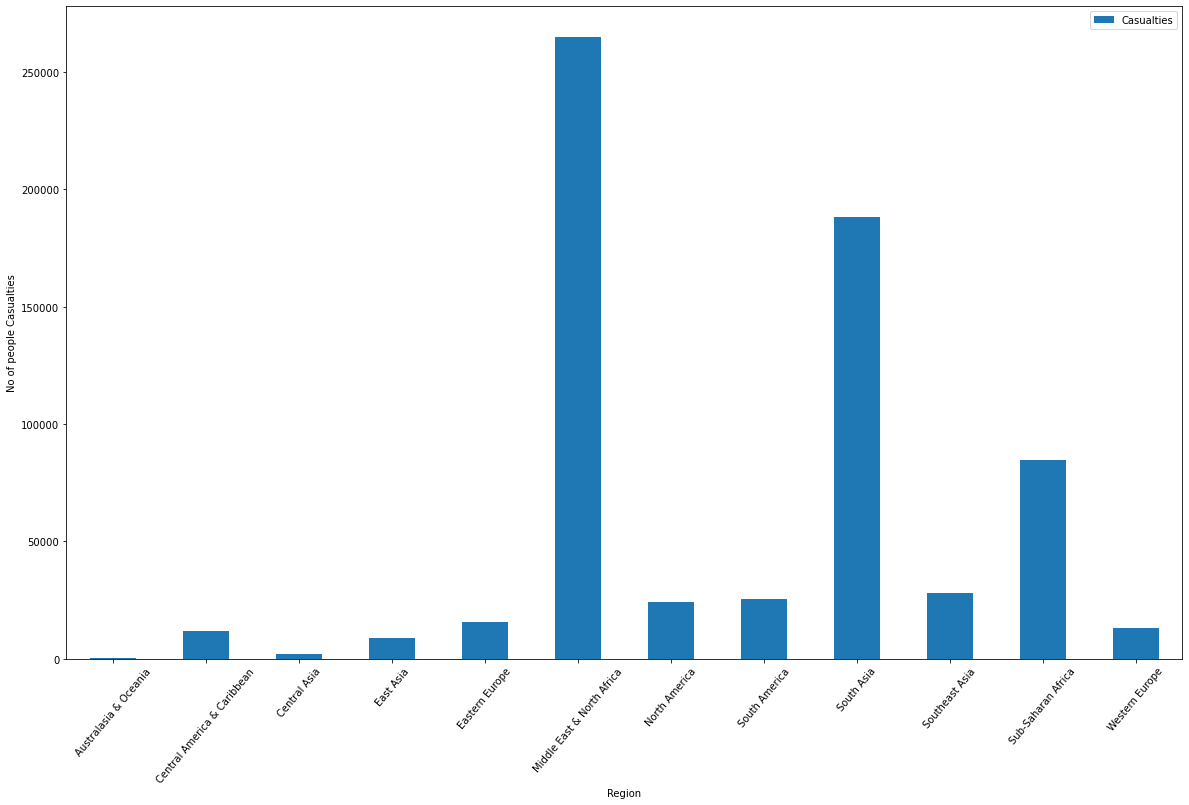

In [22]:
fig,ax1=plt.subplots(figsize=(20,12))
df1=df[['Region','Casualties']].groupby(['Region']).sum()
df1.plot(kind='bar',ax=ax1)
plt.xticks(rotation=50)
plt.xlabel('Region')
plt.ylabel('No of people Casualties')
plt.show()

#### PLot for No of People Killed Yearly

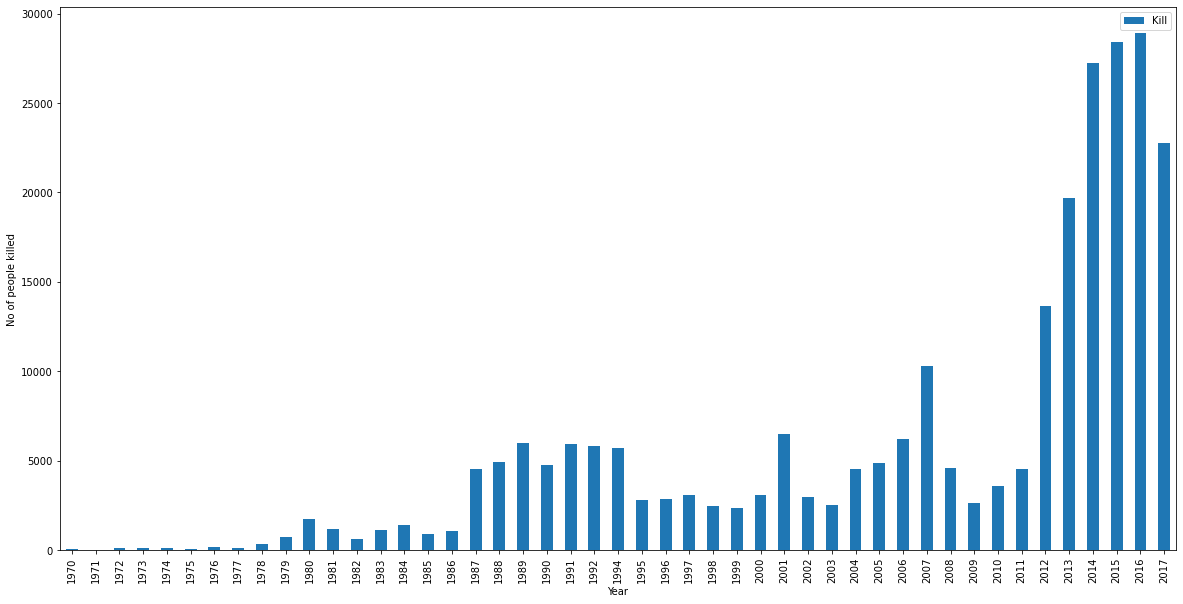

In [23]:
fig,ax1=plt.subplots(figsize=(20,10))
df1=df[['Year','Kill']].groupby(['Year']).sum()
df1.plot(kind='bar',ax=ax1)
plt.xlabel('Year')
plt.ylabel('No of people killed')
plt.show()

####  PLot for Types of Attacks happend

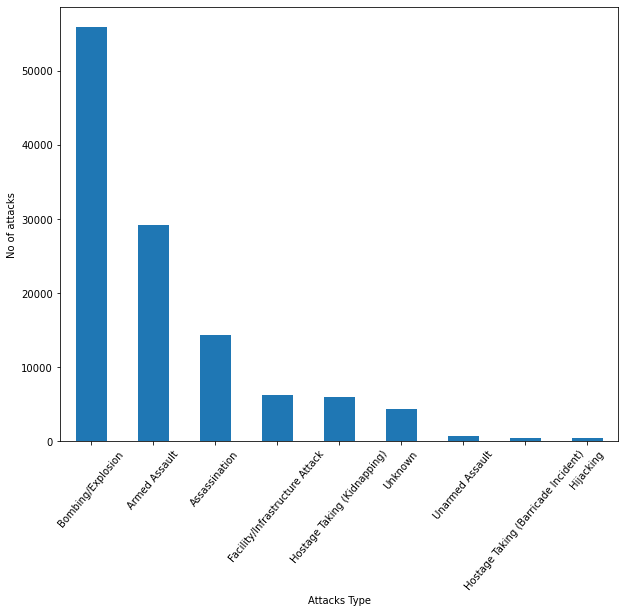

In [24]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(10,8))
plt.xticks(rotation=50)
plt.xlabel('Attacks Type')
plt.ylabel('No of attacks')
plt.show()

#### PLot for No of people killed due to certain type of Attack

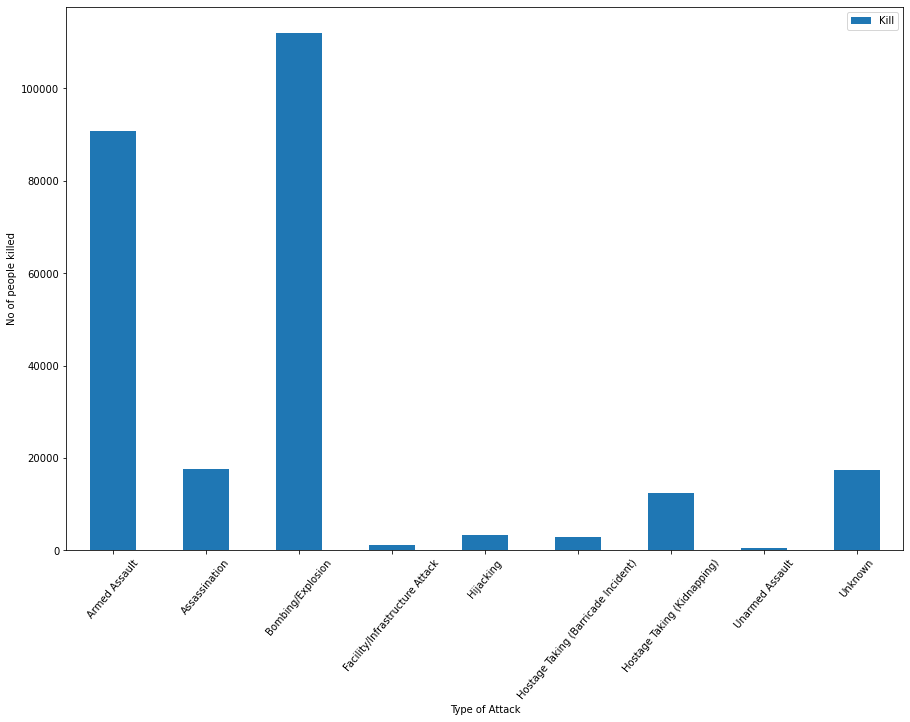

In [25]:
df[['Attacktype','Kill']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=50)
plt.xlabel('Type of Attack')
plt.ylabel('No of people killed')
plt.show()

#### Plot of No of people wounded due to certain attacktype

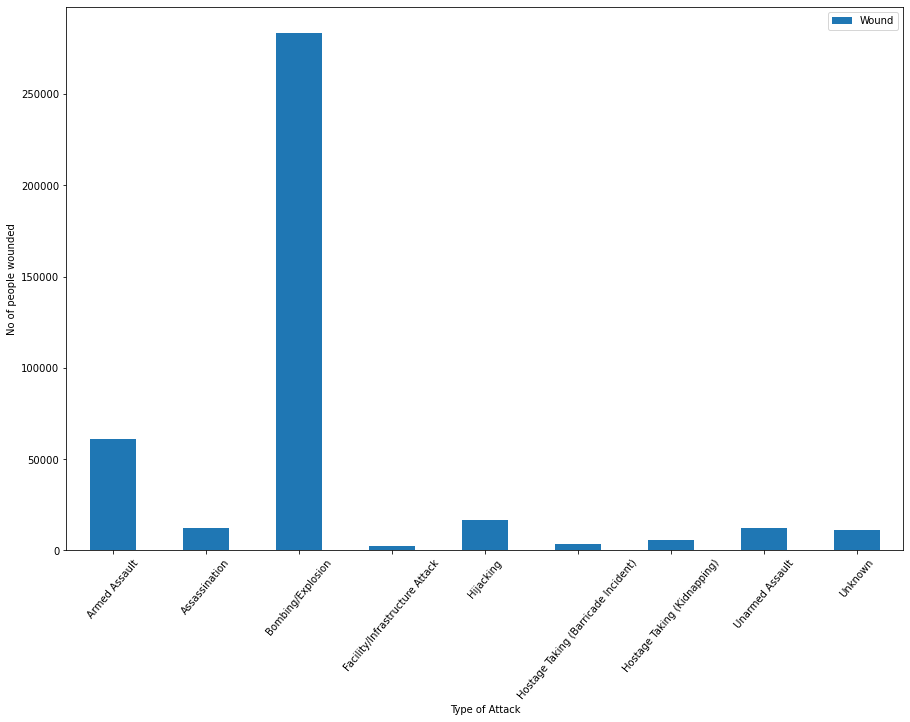

In [26]:
df[['Attacktype','Wound']].groupby(['Attacktype'],axis=0).sum().plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=50)
plt.xlabel('Type of Attack')
plt.ylabel('No of people wounded')
plt.show()

#### PLot of what type of attack where used in the attacks

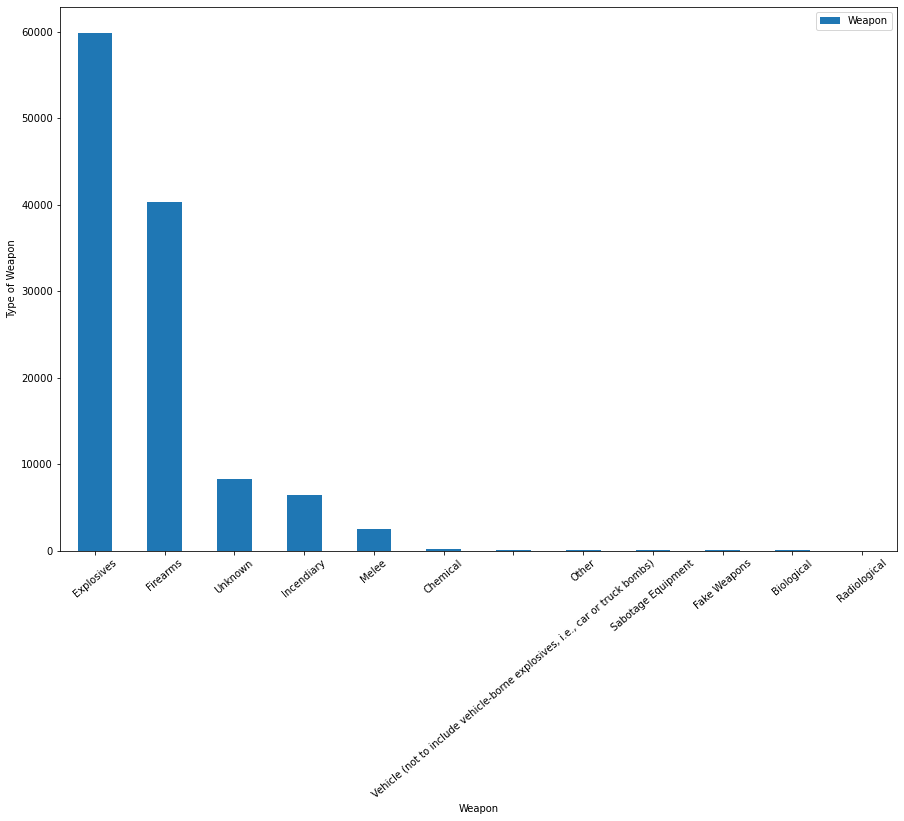

In [27]:
df['Weapon'].value_counts().to_frame().sort_values('Weapon', axis=0,ascending=False).head(20).plot(kind='bar',figsize=(15,10))
plt.xlabel('Weapon')
plt.ylabel('Type of Weapon')
plt.xticks(rotation=40)
plt.show()

#### Pie diagram of the percentage of terrorist attack happend in Years

In [28]:
df['Decade']=pd.cut(df['Year'], bins=[1969,1980,1990,2000,2010,2020], labels=['1970-1980','1980-1990','1990-2000','2000-2010','2010-2017'])
df[['Year','Decade']].sample(10)

,Year,Decade
164867,2016,2010-2017
120733,2013,2010-2017
134710,2014,2010-2017
54788,1994,1990-2000
168107,2016,2010-2017
107194,2012,2010-2017
144461,2015,2010-2017
130385,2014,2010-2017
107201,2012,2010-2017
108586,2012,2010-2017


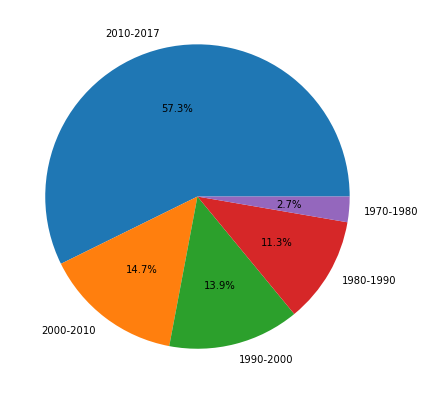

In [29]:
a=df['Decade'].value_counts()
fig=plt.figure(figsize=(7,7))
plt.pie(a,labels=a.index,autopct='%1.1f%%')
plt.show()

#### PLot of the No of Cities affected by the Terrorist attacks

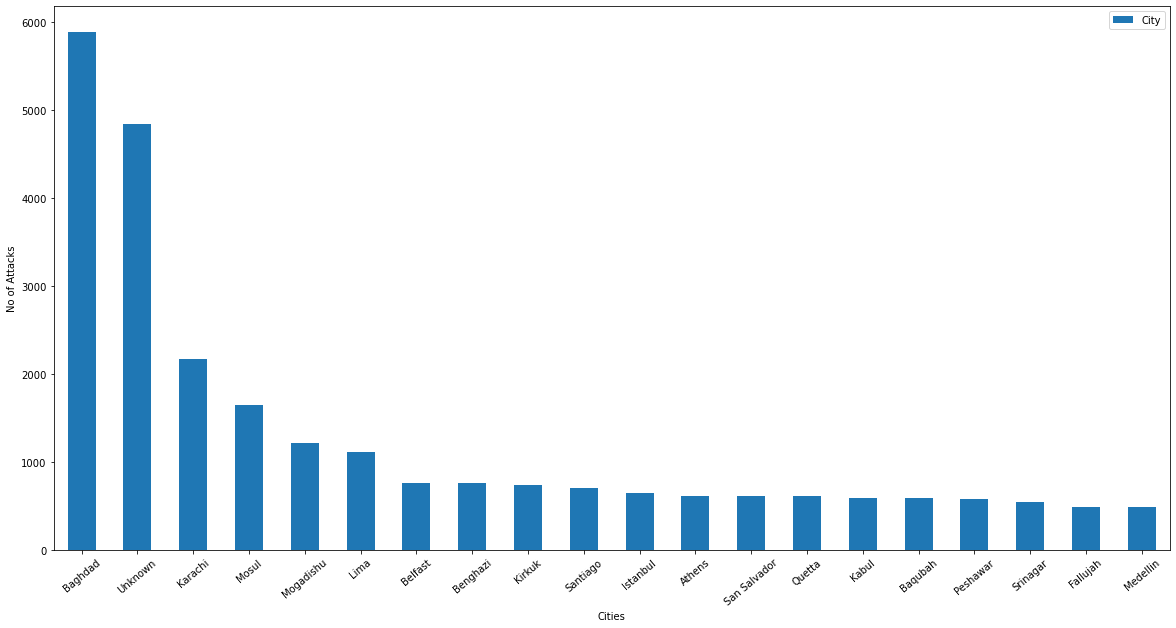

In [30]:
df['City'].value_counts().to_frame().sort_values('City', axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10))
plt.xlabel('Cities')
plt.ylabel('No of Attacks')
plt.xticks(rotation=40)
plt.show()

## Concusion
1.  Most affected Region- Middle East & North Africa. Among them Iraq is the country shows higher terror attacks, and Baghdad which its captial, which highest no of attacks.
2. Terror attacks decreased after year 2011 but increased and peak in year 2014, then decreased next years.  
3. Since there where less terror attacks after year 2014. NO of people killed is high in year 2016.
4. SInce Middle East & North Africa is the highest affected regions of terrorism There are more no of Casualties.
5. Bombing/Explosive are the weapons used by Terrorists according to this Dataset. 
6. The Rate of Terror Attack was 57% in 2010-2017. Which is the highest since 1970.

### Hot Zone of Terrorism is Middle East & North Africa 
### Precautions- 
##### Stay away from unknown Things/Substances/Bags etc. Report to public servants if found any kind of thing. 
##### Hospitals should have atleast 1 department for Burns treatment, as explosives are used majoritively.
##### Spread awareness among common people about emergency numbers,first aid and Mental prepration etc.